In [9]:
# ML-Program for linear Regression

In [37]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [11]:
path = 'd:\python\ex1\ex1data1.txt'  
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])  
data.head()  

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [12]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0,0.5,'Profit')

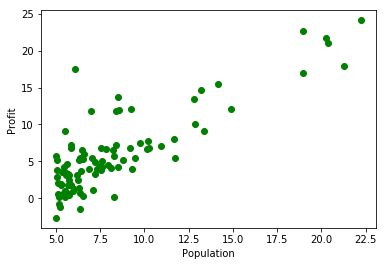

In [16]:
fig, ax1 = plt.subplots(figsize=(6,4))  
ax1.plot(data[['Population']], data[['Profit']],'go-', linewidth=0)
ax1.set_xlabel('Population')  
ax1.set_ylabel('Profit')  
#plt.show
#data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8)) 
#data.plot(kind='scatter', x=data[['Profit']], y=data[['Population']], figsize=(12,8)) 

In [18]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [19]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]  

In [20]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)  
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0]))  

In [21]:
X.shape, theta.shape, y.shape 

((97, 2), (1, 2), (97, 1))

In [22]:
computeCost(X, y, theta)  

32.072733877455676

In [23]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [24]:
# initialize variables for learning rate and iterations
alpha = 0.01  
iters = 1000

In [25]:
# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)  
g  

matrix([[-3.24140214,  1.1272942 ]])

In [26]:
computeCost(X, y, g)  

4.515955503078912

Text(0.5,1,'Predicted Profit vs. Population Size')

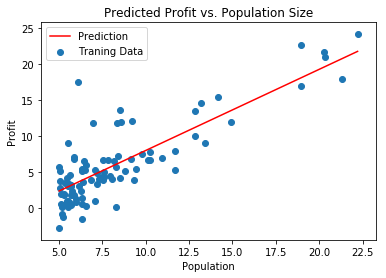

In [27]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(6,4))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  

Text(0.5,1,'Error vs. Training Epoch')

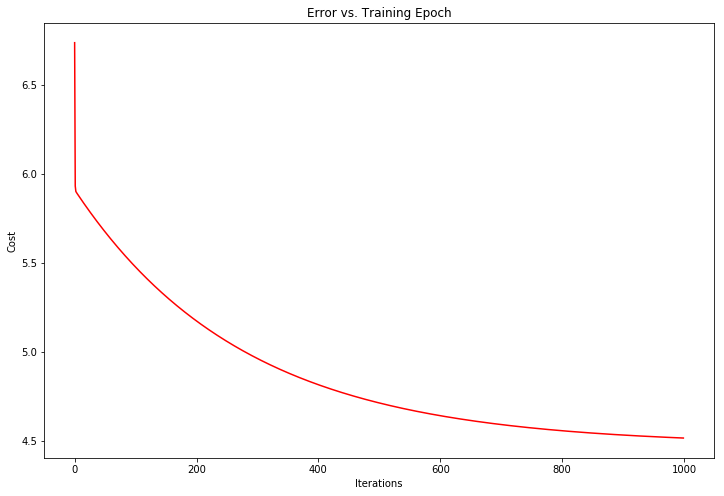

In [28]:
# how cost comes down with each itteration 
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

In [49]:
#cost chart
temp1=np.matrix(np.zeros([25,25]))

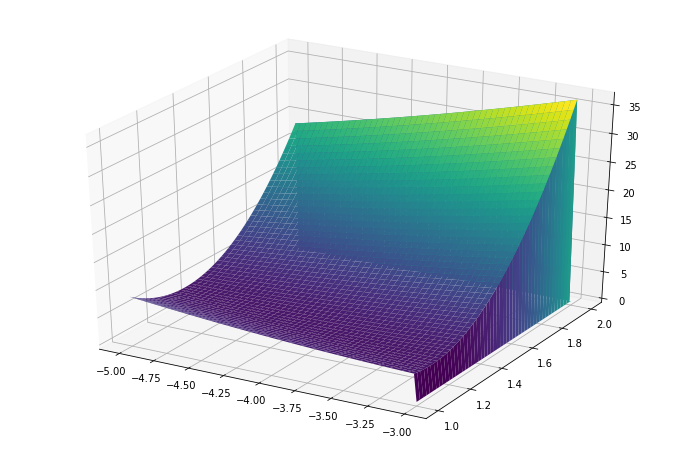

In [129]:
N=99
temp1=np.matrix(np.zeros([N+1,N+1]))
X2 = np.linspace(-5, -3, N+1)
Y2 = np.linspace(1, 2, N+1)
X2, Y2 = np.meshgrid(X2, Y2)

X2.shape
Y2.shape

for x1 in range(0, N):
    for y1 in range(0, N):
        theta = np.matrix(np.array([X2[x1,y1],Y2[x1,y1]]))
        temp1[x1,y1]=computeCost(X, y, theta)  
#plt.plot(range(0,25), range(0,25), range(0,25), 'r')  

fig2 = plt.figure(figsize=(12,8))
ax = fig2.gca(projection='3d')
ax.plot_surface( X2, Y2, temp1, rstride=2, cstride=2, linewidth=6, antialiased=True, cmap=cm.viridis)
#cset = ax.contourf(X2, Y2, temp1, zdir='z', offset=-11, cmap=cm.viridis)